In [17]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [18]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/*.nc'))
print("%s"%(nc_filename))

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1983.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1983m07d14.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1983m08d13.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1987.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1987m07d14.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1991.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1991m07d14.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y2000.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y2000m07d14.nc']


In [19]:
grid=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

tmask=grid.variables['tmask'][:]
nav_lon=grid.variables['nav_lon'][:]
nav_lat=grid.variables['nav_lat'][:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

In [20]:
grid=nc.Dataset(nc_filename[0])
chl=grid.variables['chl'][:]
dep=grid.variables['deptht'][:]
chl=np.ma.masked_where(tmask==0, chl)
chl=np.average(chl[0,0:16,:,:],axis=0)
print chl.shape

(800, 544)


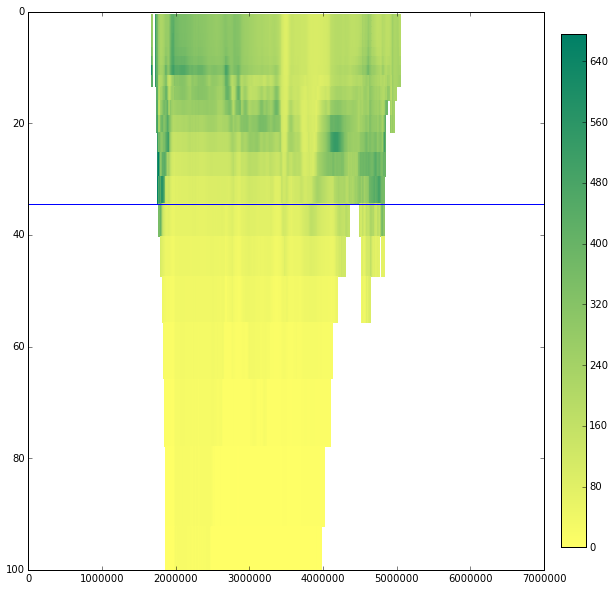

In [86]:

grid=nc.Dataset(nc_filename[0])
chl=grid.variables['chl'][:]
dep=grid.variables['deptht'][:]
chl=np.ma.masked_where(tmask==0, chl)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


x_lon, y_lat = m(nav_lon, nav_lat)
plt.pcolor(x_lon[700,:],dep[:],chl[0,:,700,:],cmap='summer_r')
plt.colorbar(fraction=0.046,pad=0.03)
plt.ylim([0,100])
plt.axhline(dep[15])
plt.gca().invert_yaxis()
plt.show()

In [76]:
def plot(filenum,layer,avg=False):

    grid=nc.Dataset(nc_filename[filenum])
    chl=grid.variables['chl'][:]
    dep=grid.variables['deptht'][:]
    chl=np.ma.masked_where(tmask==0, chl)
    if avg==False:
        chl=np.ma.masked_where(nav_lat<70, chl[0,layer,:,:])
        chl=np.ma.masked_where(bathy<500, chl)
    else:
        chl=np.average(chl[0,0:layer+1,:,:],axis=0)
        chl=np.ma.masked_where(bathy<500, chl)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85')
    m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=80)
    m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=80)
    
    
    x_lon, y_lat = m(nav_lon, nav_lat)
    m.contour(x_lon[520:-10,:],y_lat[520:-10,:],bathy[520:-10,:],linewidth=0.075,colors='black',alpha=0.4)
    if avg==False:
        plt.title('Chl : %s (depth: %s m)'%(nc_filename[filenum][-14:-3],dep[layer]))
        m.pcolor(x_lon[520:-10,:],y_lat[520:-10,:],chl[520:-10,:],cmap='summer_r')
        plt.colorbar(fraction=0.046,pad=0.03)
    else:
        plt.title('Chl : %s (depth averaged)'%(nc_filename[filenum][-14:-3]))
        m.pcolor(x_lon[520:-10,:],y_lat[520:-10,:],chl[520:-10,:],vmin=chl[520:-10,:].min(),\
                 vmax=chl[520:-10,:].max()*0.6,cmap='summer_r')
        plt.colorbar(fraction=0.046,pad=0.03)
    plt.show()


#### yearly average Chl in 1983 at different depth

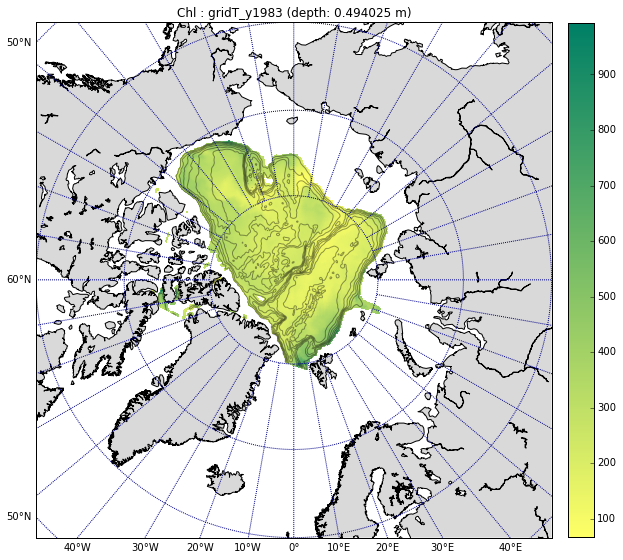

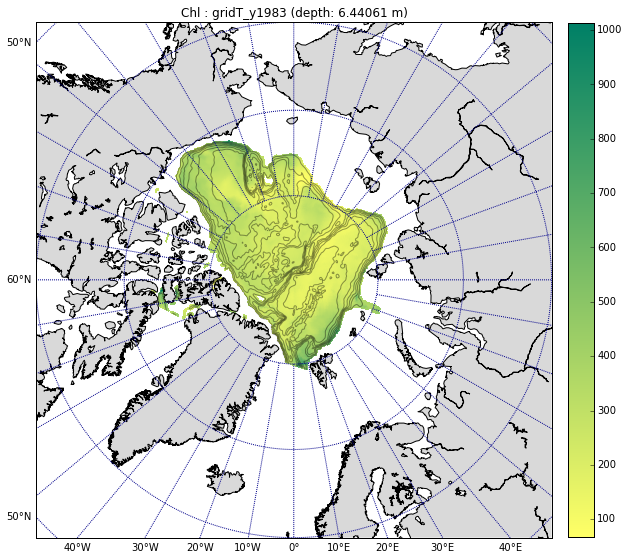

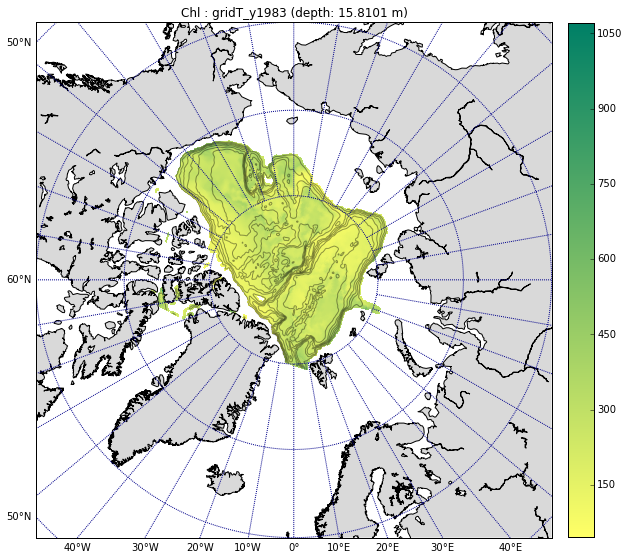

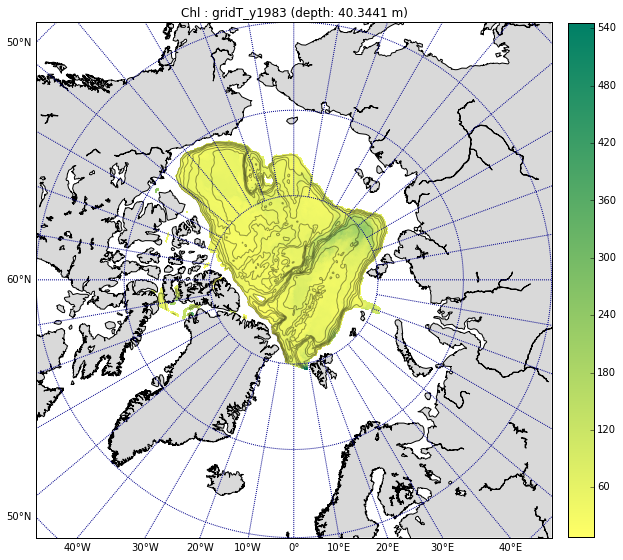

In [77]:
plot(0,0,avg=False)
plot(0,5,avg=False)
plot(0,10,avg=False)
plot(0,16,avg=False)
# The plots indicate the Chl decreased with depth. 
# They are high at the surface ( more specifit, in the first 15 meter).

#### averged Chl for the top 40 m

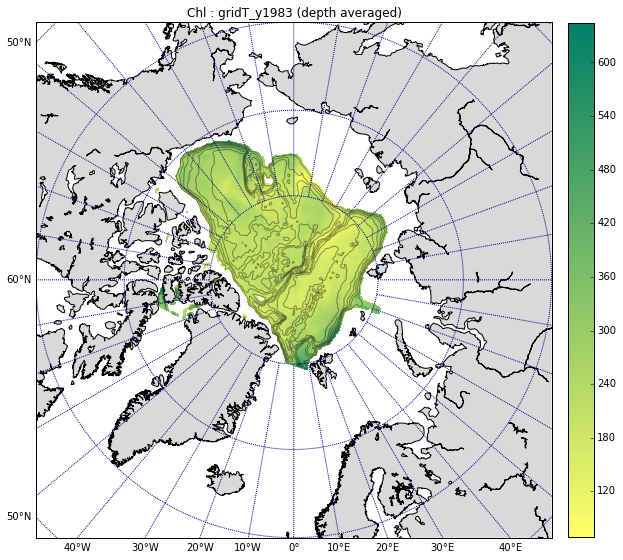

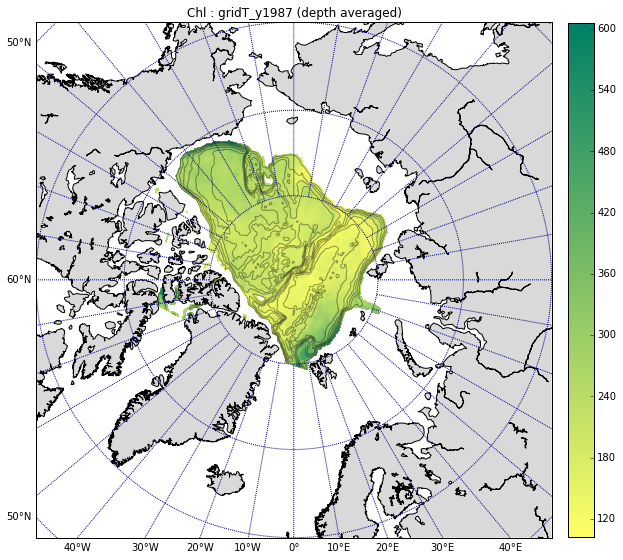

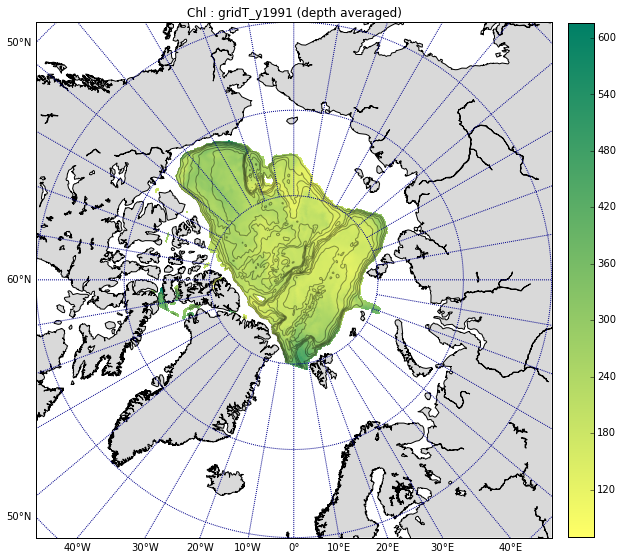

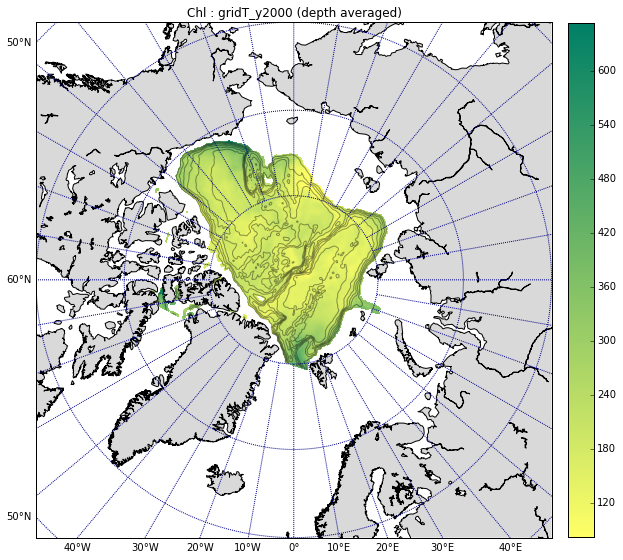

In [87]:
plot(0,15,avg=True)
plot(3,15,avg=True)
plot(5,15,avg=True)
plot(7,15,avg=True)

#### yearly average Chl in 1983,1987,1991,2000

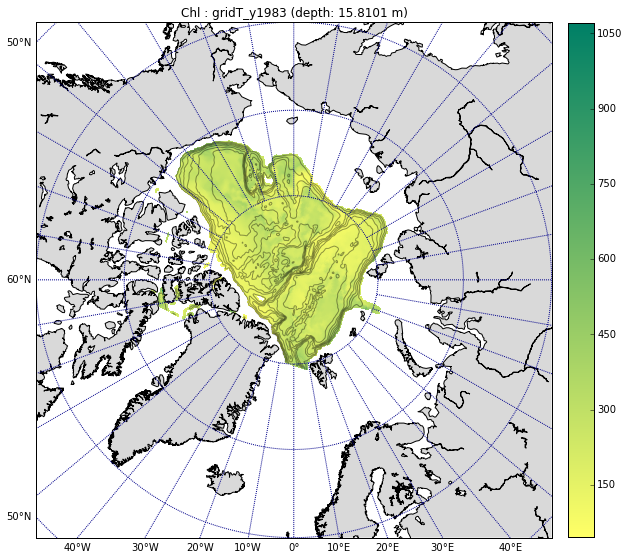

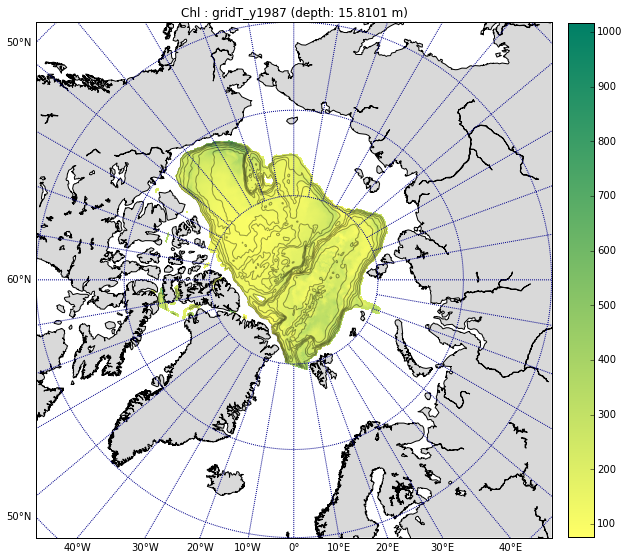

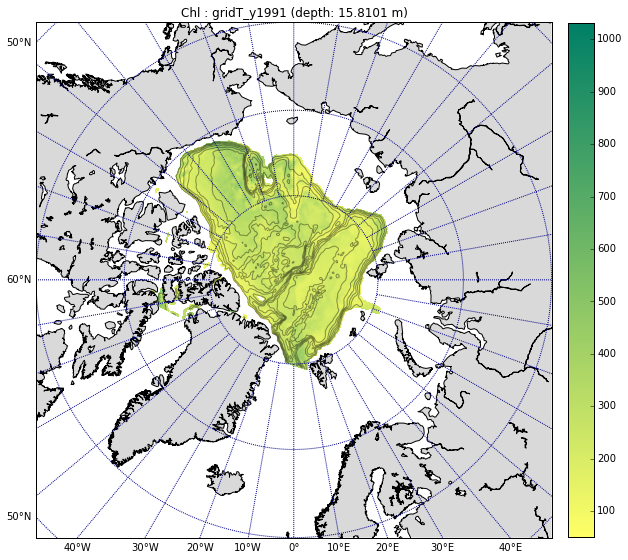

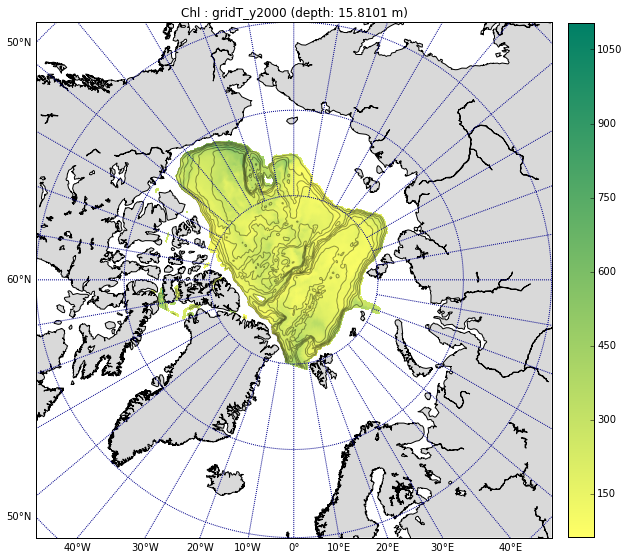

In [79]:
plot(0,10,avg=False)
plot(3,10,avg=False)
plot(5,10,avg=False)
plot(7,10,avg=False)

# Try to see the yearly difference. (CB always has high Chl conc.)

#### summer Chl in 1983 

(I choose mid July and Aug to plot. Because people have seen earier bloom than the real world in BLING)

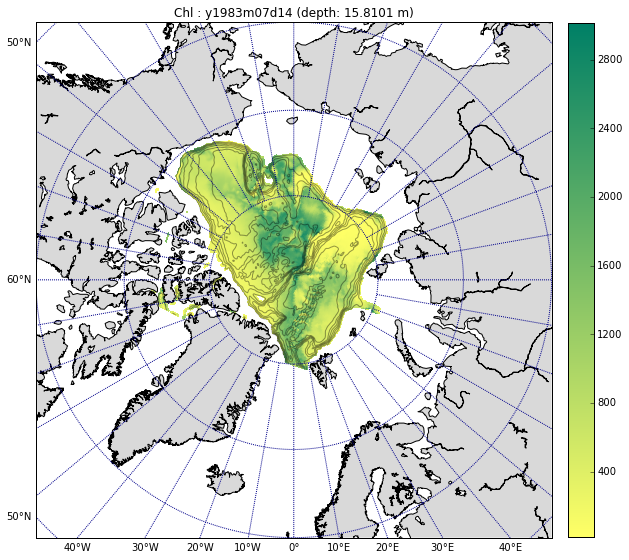

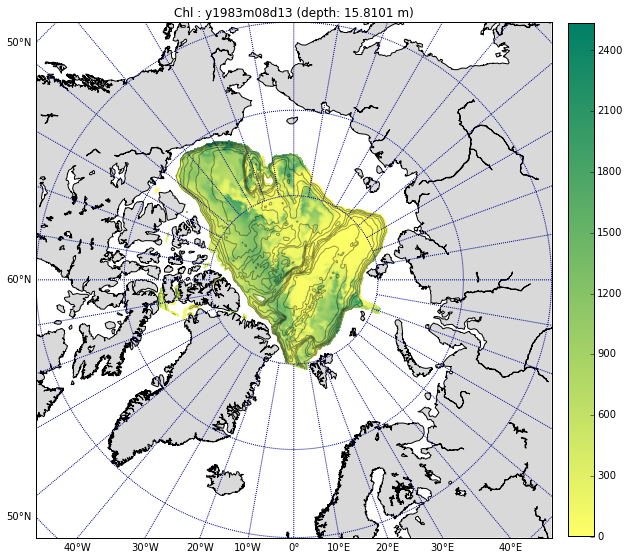

In [80]:
plot(1,10,avg=False) # the bloom started on Alpha Ridge.. Why?
plot(2,10,avg=False)

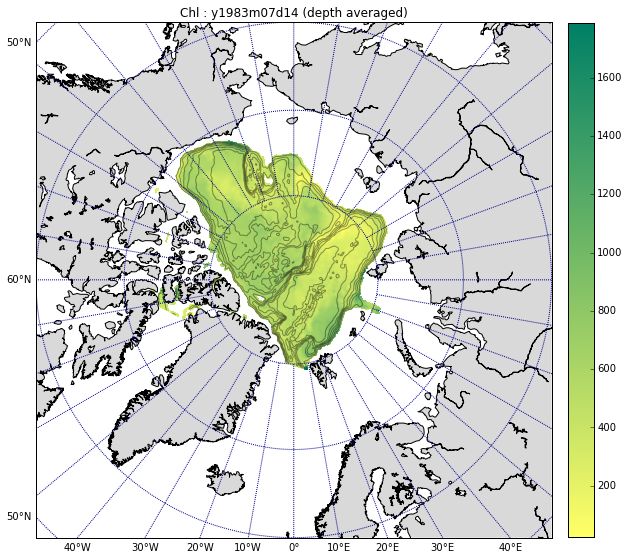

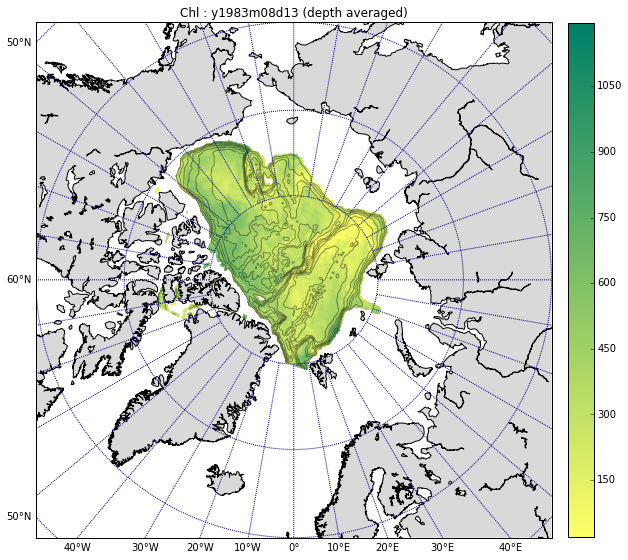

In [88]:
plot(1,15,avg=True) # the bloom started on Alpha Ridge.. Why?
plot(2,15,avg=True)

#### Chl in the summer of 1987,1991,2000 (I chose July to plot because there is an early bloom in Bling )

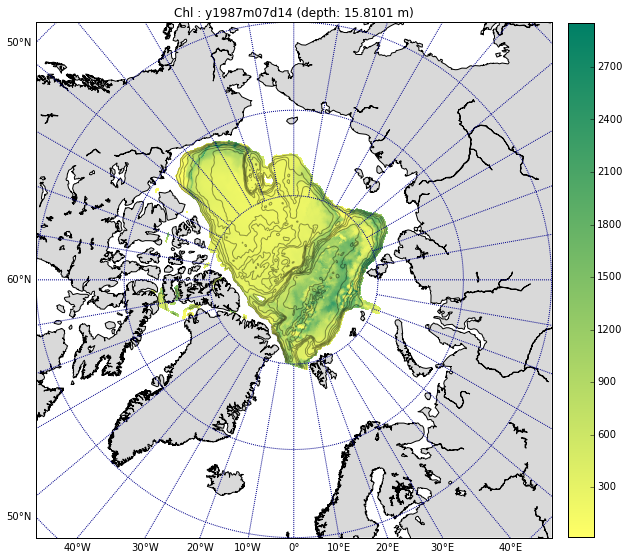

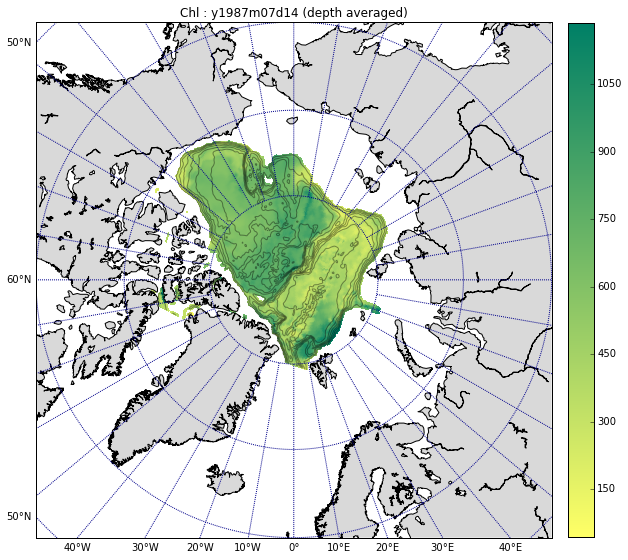

In [89]:
plot(4,10,avg=False)
plot(4,15,avg=True)

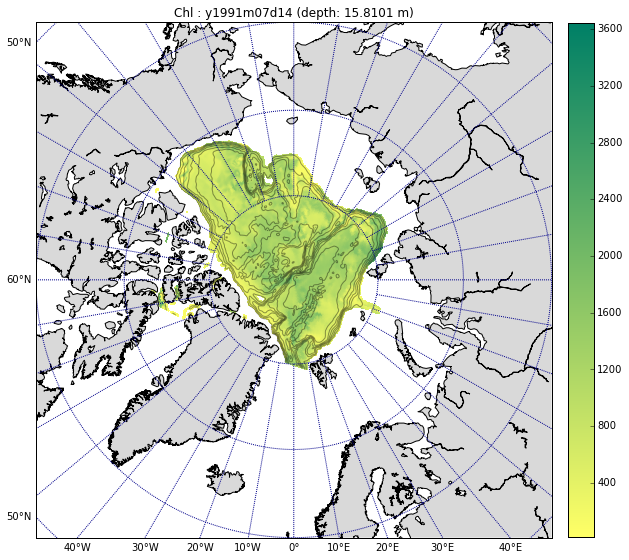

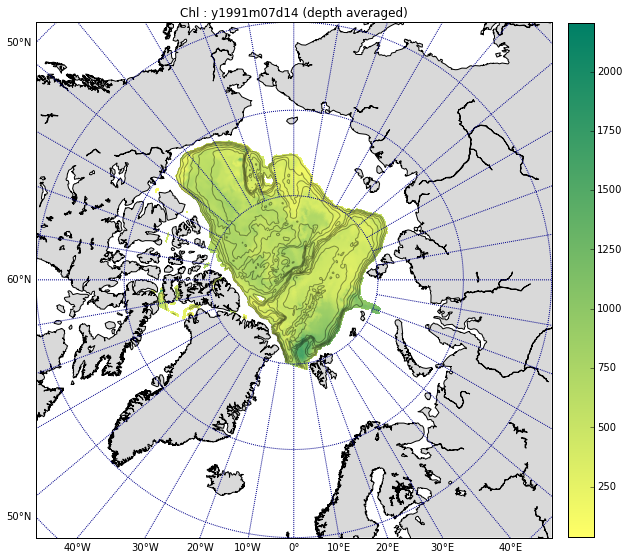

In [90]:
plot(6,10,avg=False)
plot(6,15,avg=True)

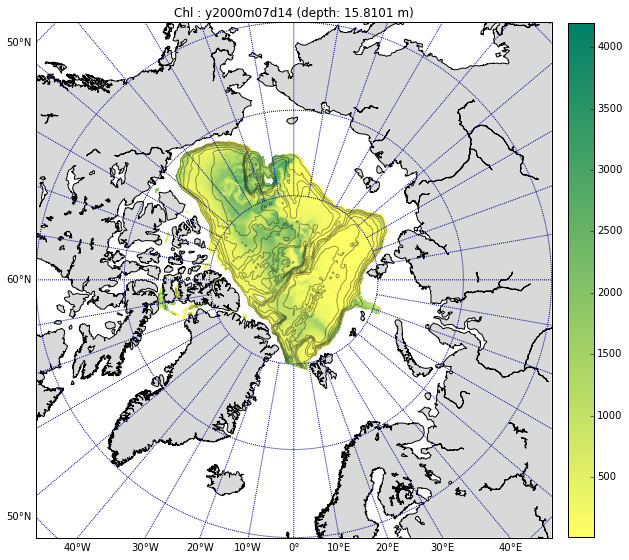

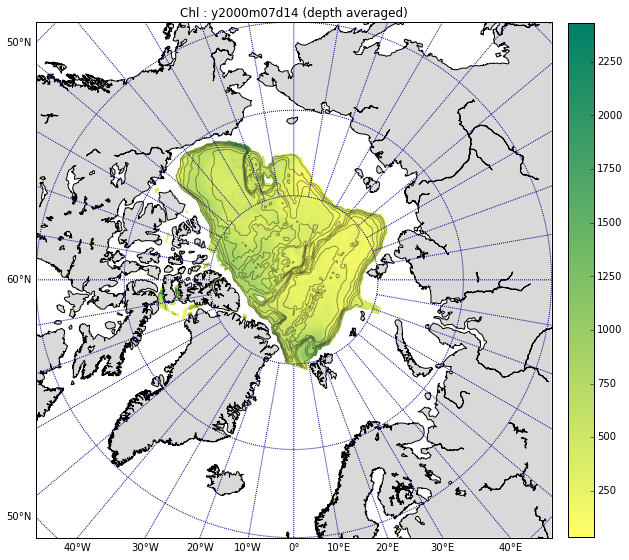

In [91]:
plot(8,10,avg=False)
plot(8,15,avg=True)